In [1]:
import pickle
import sys
import numpy as np
from sklearn.cluster import KMeans
sys.path.append('/home/ardelalegre/SoundMapping/Analysis/Util')
from get_time_interval_data import *
from PCA import get_cdata
from PCA import get_eigen_vectors
from PCA import project_to_eigen_vectors
from Plot import plot_data
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl

In [2]:
room_model_chair = mpimg.imread('room_model_v2.png')

In [3]:
sample_time = 0.064

In [4]:
# extracting aug 19 data from pickle file

data_0819 = pickle.load(open('/home/ardelalegre/CSE4223-ODAS/preprocessing/python/aug 19/exp_08_19_better_data.p', 'rb'))
ind = [18]+[i for i in range(18)]
data_0819=data_0819[:,ind]


# creating eig_vals and eig_vecs from the data
eigen_values_0819, eigen_vectors_0819 = get_eigen_vectors(data_0819)




In [5]:
exp_data = get_time_interval_matrix_data('Nov 3 2020 04:00PM', 'Nov 3 2020 04:25PM')

In [6]:
data_mean = np.nanmean(exp_data[:,1:],axis = 0,keepdims = True)
tmp = exp_data[:,1:] - data_mean
exp_cdata=np.nan_to_num(tmp)

/home/ardelalegre/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


In [7]:
projections = project_to_eigen_vectors(exp_cdata, 2, eigen_values_0819, eigen_vectors_0819)

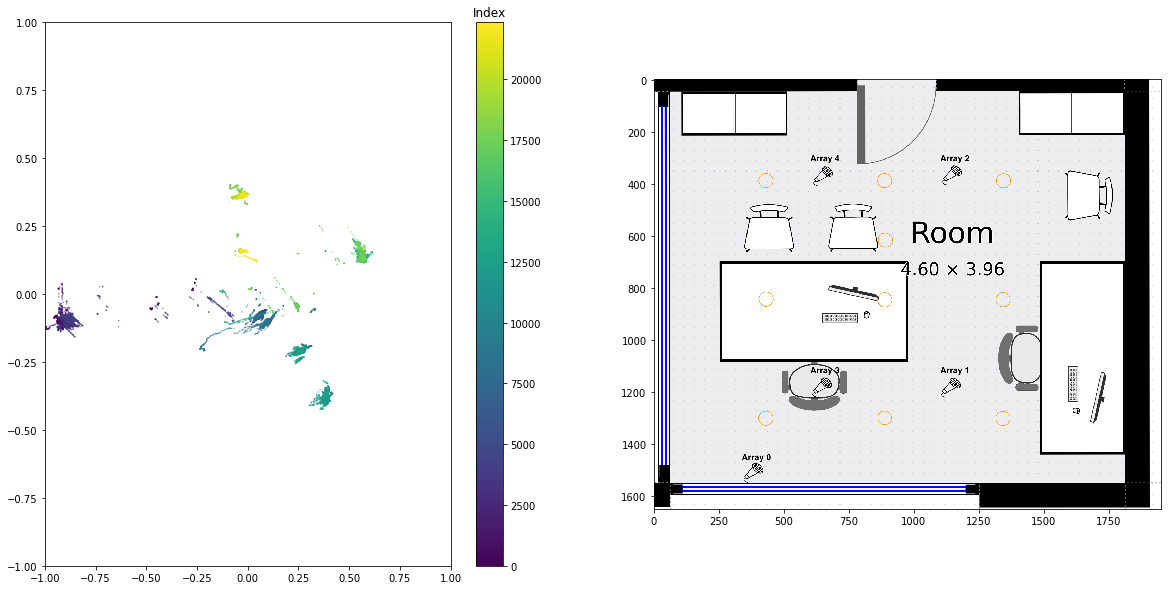

In [8]:
fig = plt.figure(figsize = [20,10])
ax = fig.add_subplot(121)
temp = ax.scatter(projections[:,0], projections[:,1], c = np.arange(projections.shape[0]), s = 0.1)
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
cbar = fig.colorbar(temp, ax=ax)
cbar.ax.set_title('Index')

ax2 = fig.add_subplot(122)
ax2.imshow(room_model_chair[450:2100,450:2400])

Strange: 2 clusters where there is supposed to be 1  
We will plot just those five minutes

In [9]:
# plot just those 5 minutes

def slice_interval_indices(data, start_timestring, end_timestring):
    
    format_timestring = '%b %d %Y %I:%M:%S%p' # setting format of input time
    
    # convert input timestrings to unix time
    
    start_standard_dt_string = datetime.datetime.strptime(start_timestring, format_timestring) 
    end_standard_dt_string = datetime.datetime.strptime(end_timestring, format_timestring)
    
    unix_start_timestring = datetime.datetime.timestamp(start_standard_dt_string)
    unix_end_timestring = datetime.datetime.timestamp(end_standard_dt_string)
    
    for x in range(data.shape[0]):
        if(data[x,0] > unix_start_timestring and data[x,0] < unix_end_timestring):
            start_index = x
            break
    for y in range(x,data.shape[0]):
        if(data[y,0] > unix_end_timestring):
            end_index = y
            break
    
    return(x,y)

In [12]:
start_time = 'Nov 3 2020 04:10:00PM'
end_time = 'Nov 3 2020 04:15:00PM'

In [49]:
x,y = slice_interval_indices(exp_data, start_time, end_time)

In [44]:
y-x

4462

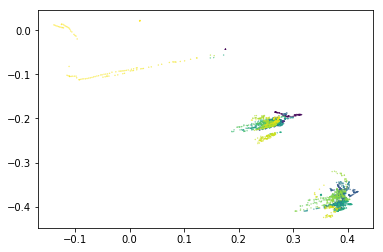

In [76]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(projections[x:y,0], projections[x:y,1], c = np.arange(y-x), s = 0.1);

In [15]:
# get projections on all eigenvectors
# plot first eigenvector projection
# plot second eigenvector projection
# take squared sum of the projections on other eigenvectors and plot that


all_proj = project_to_eigen_vectors(exp_cdata, 15, eigen_values_0819, eigen_vectors_0819)

In [19]:
first_proj = all_proj[x:y,0]
second_proj = all_proj[x:y,1]
squared_sum_rest = np.sum(all_proj[x:y,2:]**2, axis = 1)

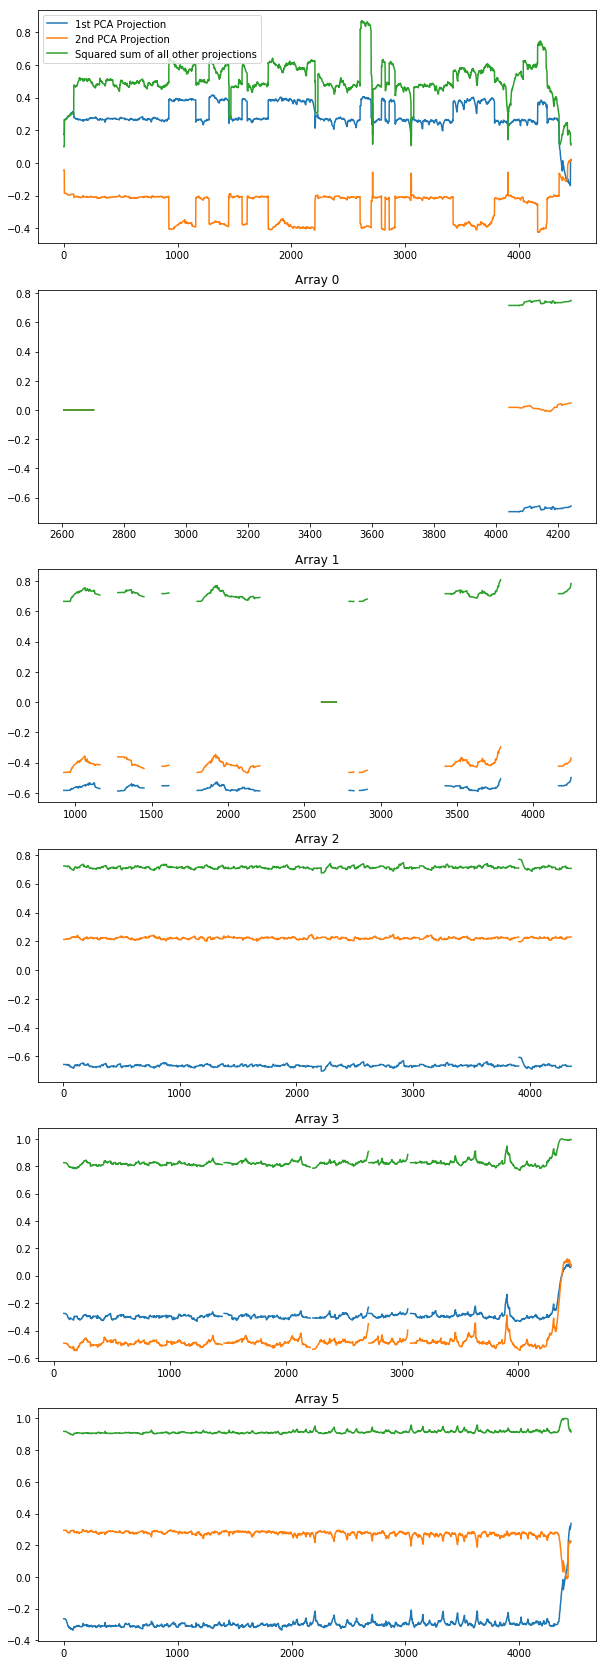

In [42]:
fig = plt.figure(figsize=[10,30])
ax1 = fig.add_subplot(611)
ax1.plot(first_proj, label = '1st PCA Projection')
ax1.plot(second_proj, label = '2nd PCA Projection')
ax1.plot(squared_sum_rest, label = 'Squared sum of all other projections')
ax1.legend()


ax2 = fig.add_subplot(612)
ax2.plot(exp_data[x:y, 1:4]);
ax2.set_title('Array 0');


ax2 = fig.add_subplot(613)
ax2.plot(exp_data[x:y, 4:7]);
ax2.set_title('Array 1');

ax2 = fig.add_subplot(614)
ax2.plot(exp_data[x:y, 7:10]);
ax2.set_title('Array 2');

ax2 = fig.add_subplot(615)
ax2.plot(exp_data[x:y, 10:13]);
ax2.set_title('Array 3');


ax2 = fig.add_subplot(616)
ax2.plot(exp_data[x:y, 16:19]);
ax2.set_title('Array 5');

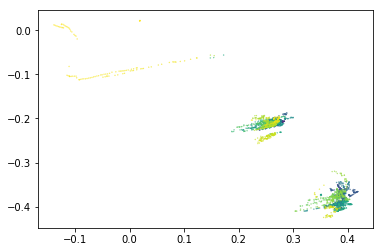

In [75]:
x,y = slice_interval_indices(exp_data, start_time, end_time)
fig = plt.figure()
ax = fig.add_subplot(111)
shift = 100
ax.scatter(projections[x+shift:y,0], projections[x+shift:y,1], c = np.arange(y-x-shift), s = 0.1);

Fraction of time inactive

In [86]:
array_1_time_active = np.sum(np.isnan(exp_data[:,1]))/exp_data.shape[0]
print(100-(array_1_time_active*100))
array_1_time_active = np.sum(np.isnan(exp_data[:,4]))/exp_data.shape[0]
print(100-array_1_time_active*100)
array_1_time_active = np.sum(np.isnan(exp_data[:,7]))/exp_data.shape[0]
print(100-array_1_time_active*100)
array_1_time_active = np.sum(np.isnan(exp_data[:,10]))/exp_data.shape[0]
print(100-array_1_time_active*100)
array_1_time_active = np.sum(np.isnan(exp_data[:,16]))/exp_data.shape[0]
print(100-array_1_time_active*100)

29.710501588437964
71.53340194192134
94.64405566244575
94.80066222202336
78.16457112175041


In [39]:
exp_data_3 = get_time_interval_matrix_data('Nov 3 2020 04:10PM', 'Nov 3 2020 04:15PM')

In [40]:
exp_data_3.shape

(4462, 19)

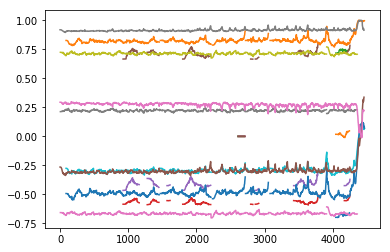

In [43]:
plt.plot(exp_data_3[:,1:]);

In [147]:
# data_mean = np.nanmean(exp_data[:,1:],axis = 0,keepdims = True)
tmp_3 = exp_data_3[:,1:] - data_mean
exp_cdata_3=np.nan_to_num(tmp_3)

In [148]:
projections_3 = project_to_eigen_vectors(exp_cdata_3, 2, eigen_values_0819, eigen_vectors_0819)

Text(0.5, 1.0, 'Index')

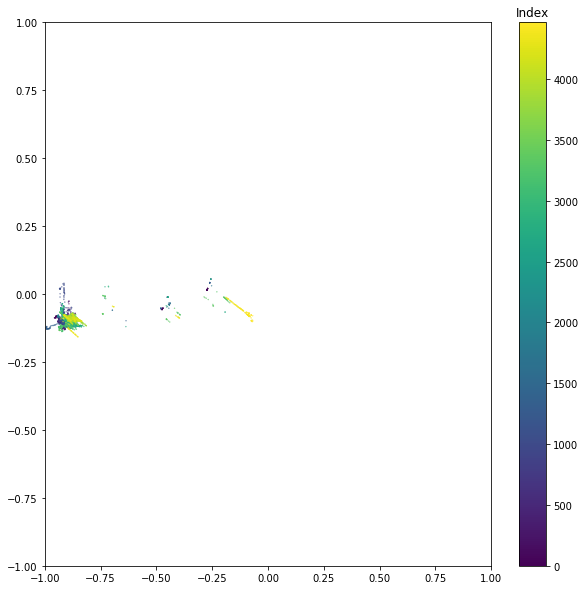

In [149]:
fig = plt.figure(figsize = [10,10])
ax = fig.add_subplot(111)
temp = ax.scatter(projections_3[:,0], projections_3[:,1], c = np.arange(projections_3.shape[0]), s = 0.1)
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
cbar = fig.colorbar(temp, ax=ax)
cbar.ax.set_title('Index')

In [150]:
projections_3_all = project_to_eigen_vectors(exp_cdata_3, 5, eigen_values_0819, eigen_vectors_0819)

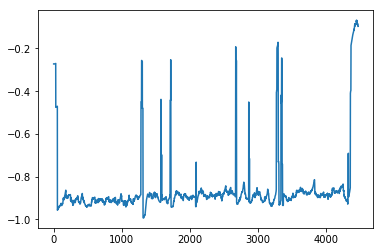

In [151]:
plt.plot(projections_3_all[:,0])

In [ ]:
plt.plot(projections_3_all[:,0])

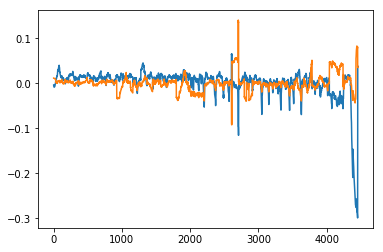

In [118]:
plt.plot(projections_3)